In [131]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from _csv import reader
import numpy as np
from OjaNetwork import OjaNetwork
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from ej1.OjaGraphics import draw_pc1, draw_autovectors
from sklearn.metrics import mean_squared_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Data

In [145]:
with open('europe.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    raw_data = list(csv_reader)
    headers =  np.array(raw_data[:1]).T[1:].flatten()
    countries = np.array(raw_data[1:]).T[:1].flatten()
    data = np.array(raw_data[1:]).T[1:].T.astype(float)
print(headers)

['Area' 'GDP' 'Inflation' 'Life.expect' 'Military' 'Pop.growth'
 'Unemployment']


## Define variables for the network

In [106]:
epochs = 3000
learning_rate = 0.0001

## Train the network

In [107]:
oja = OjaNetwork(epochs, data,learning_rate)
pca_oja = oja.train()
print(pca_oja)

[ 0.12557214 -0.50037442  0.40716646 -0.48295443  0.18748877 -0.47548698
  0.27127047]


## Calculate primary component with external library

In [108]:
standard_scaler = StandardScaler()
standard_scaler.fit(data)
scaled_data = standard_scaler.transform(data)

pca = PCA(n_components=5)
pca.fit(scaled_data)
x = pca.transform(scaled_data)
print(pca.components_[0, :])

[ 0.1248739  -0.50050586  0.40651815 -0.48287333  0.18811162 -0.47570355
  0.27165582]


## Plot First Component

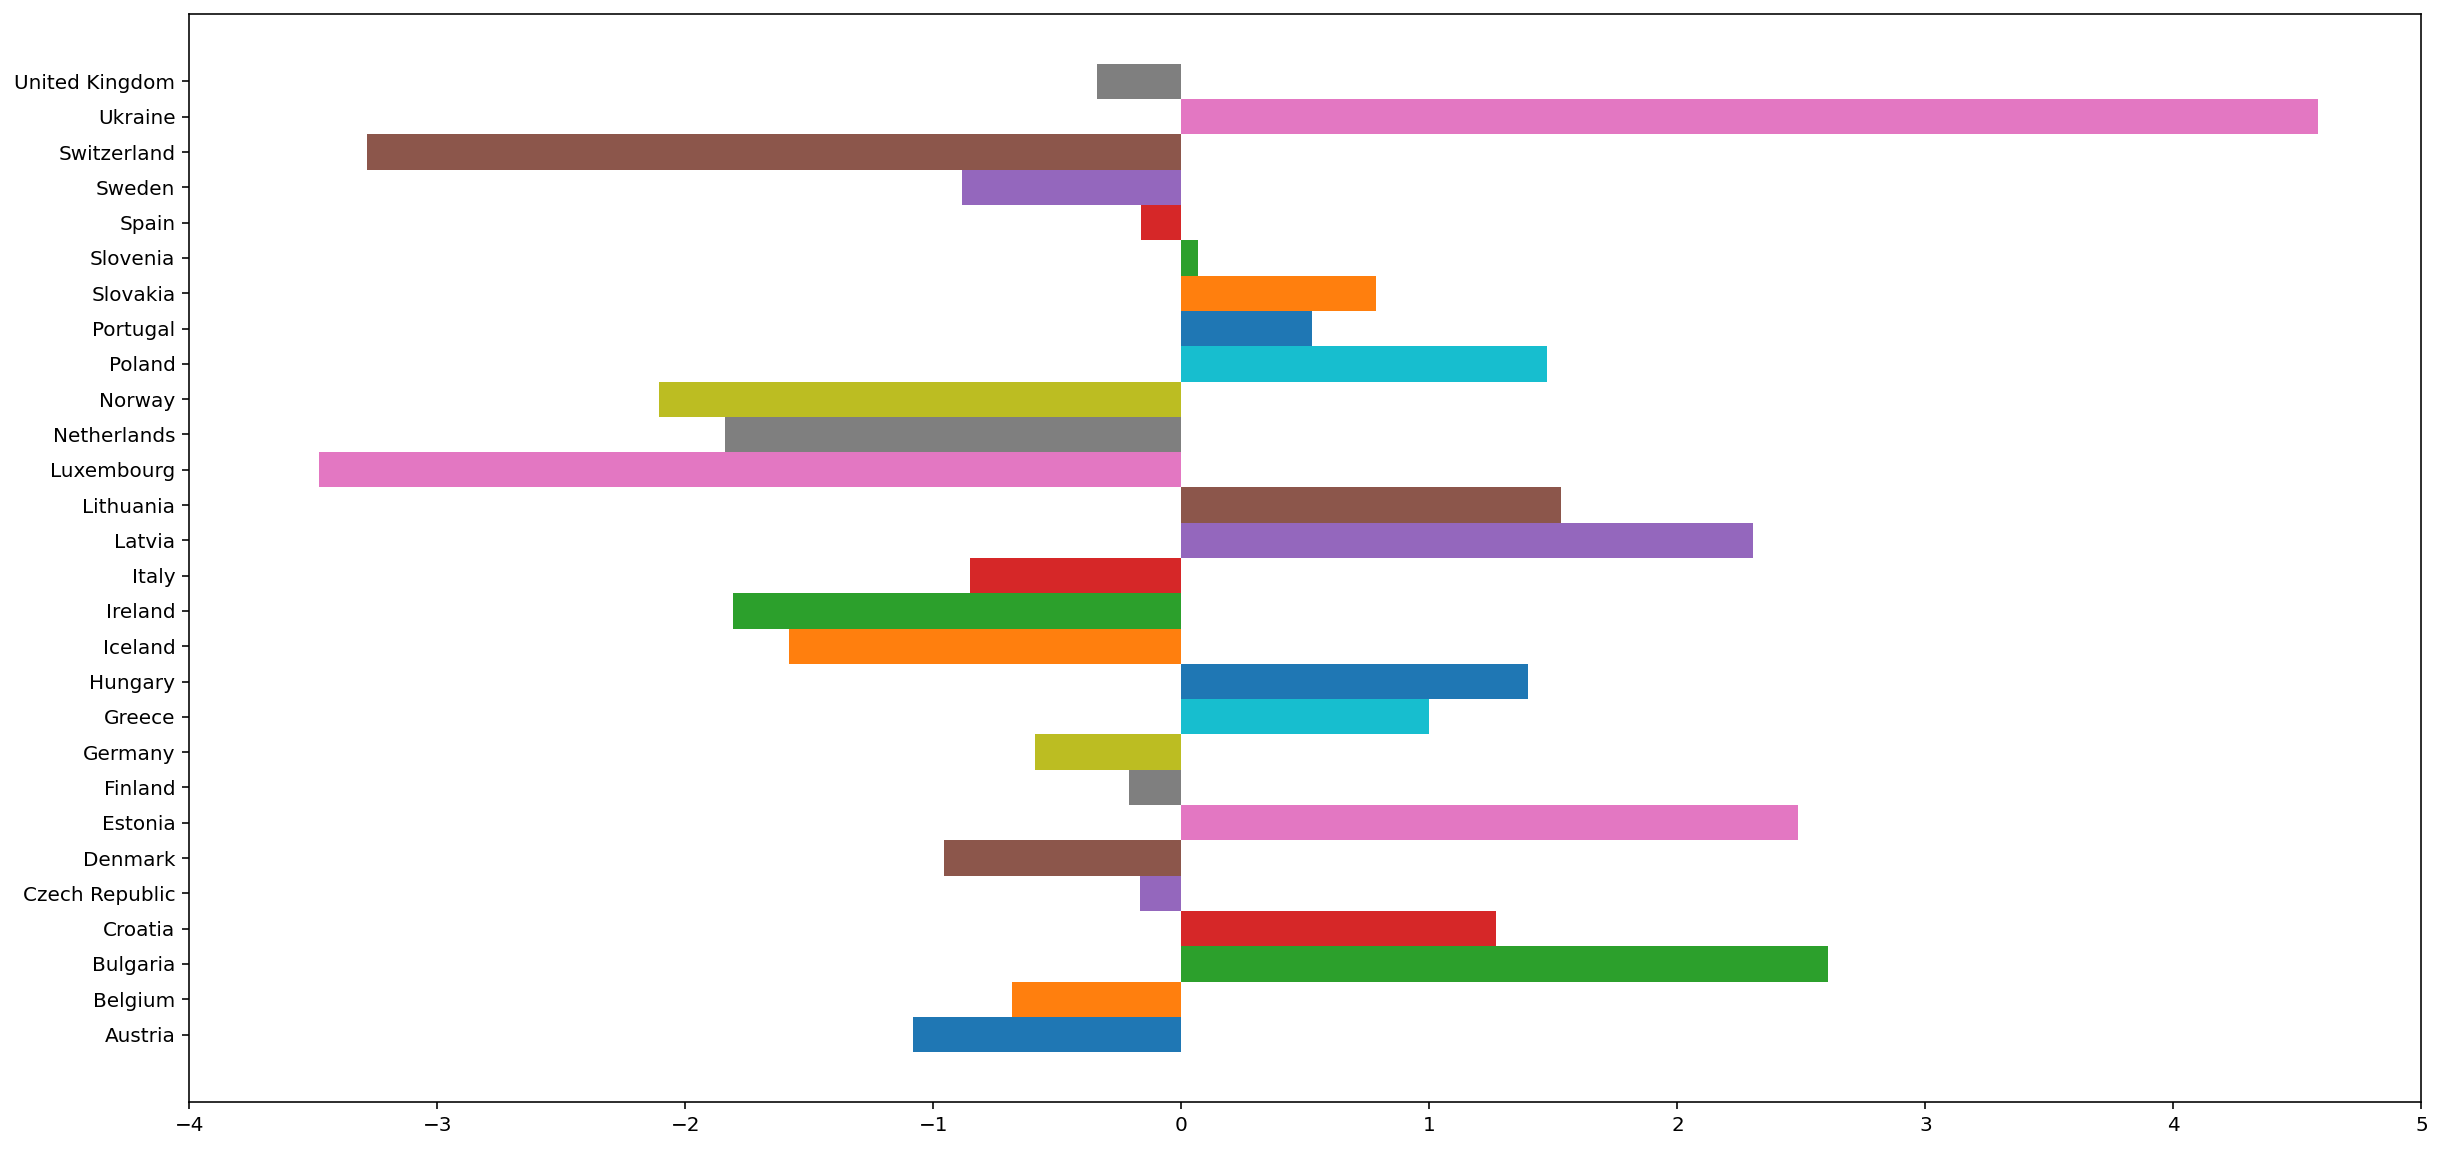

In [109]:
data = np.matmul(oja.values,pca_oja)
draw_pc1(data,countries)

## Plot autovectors from primary component

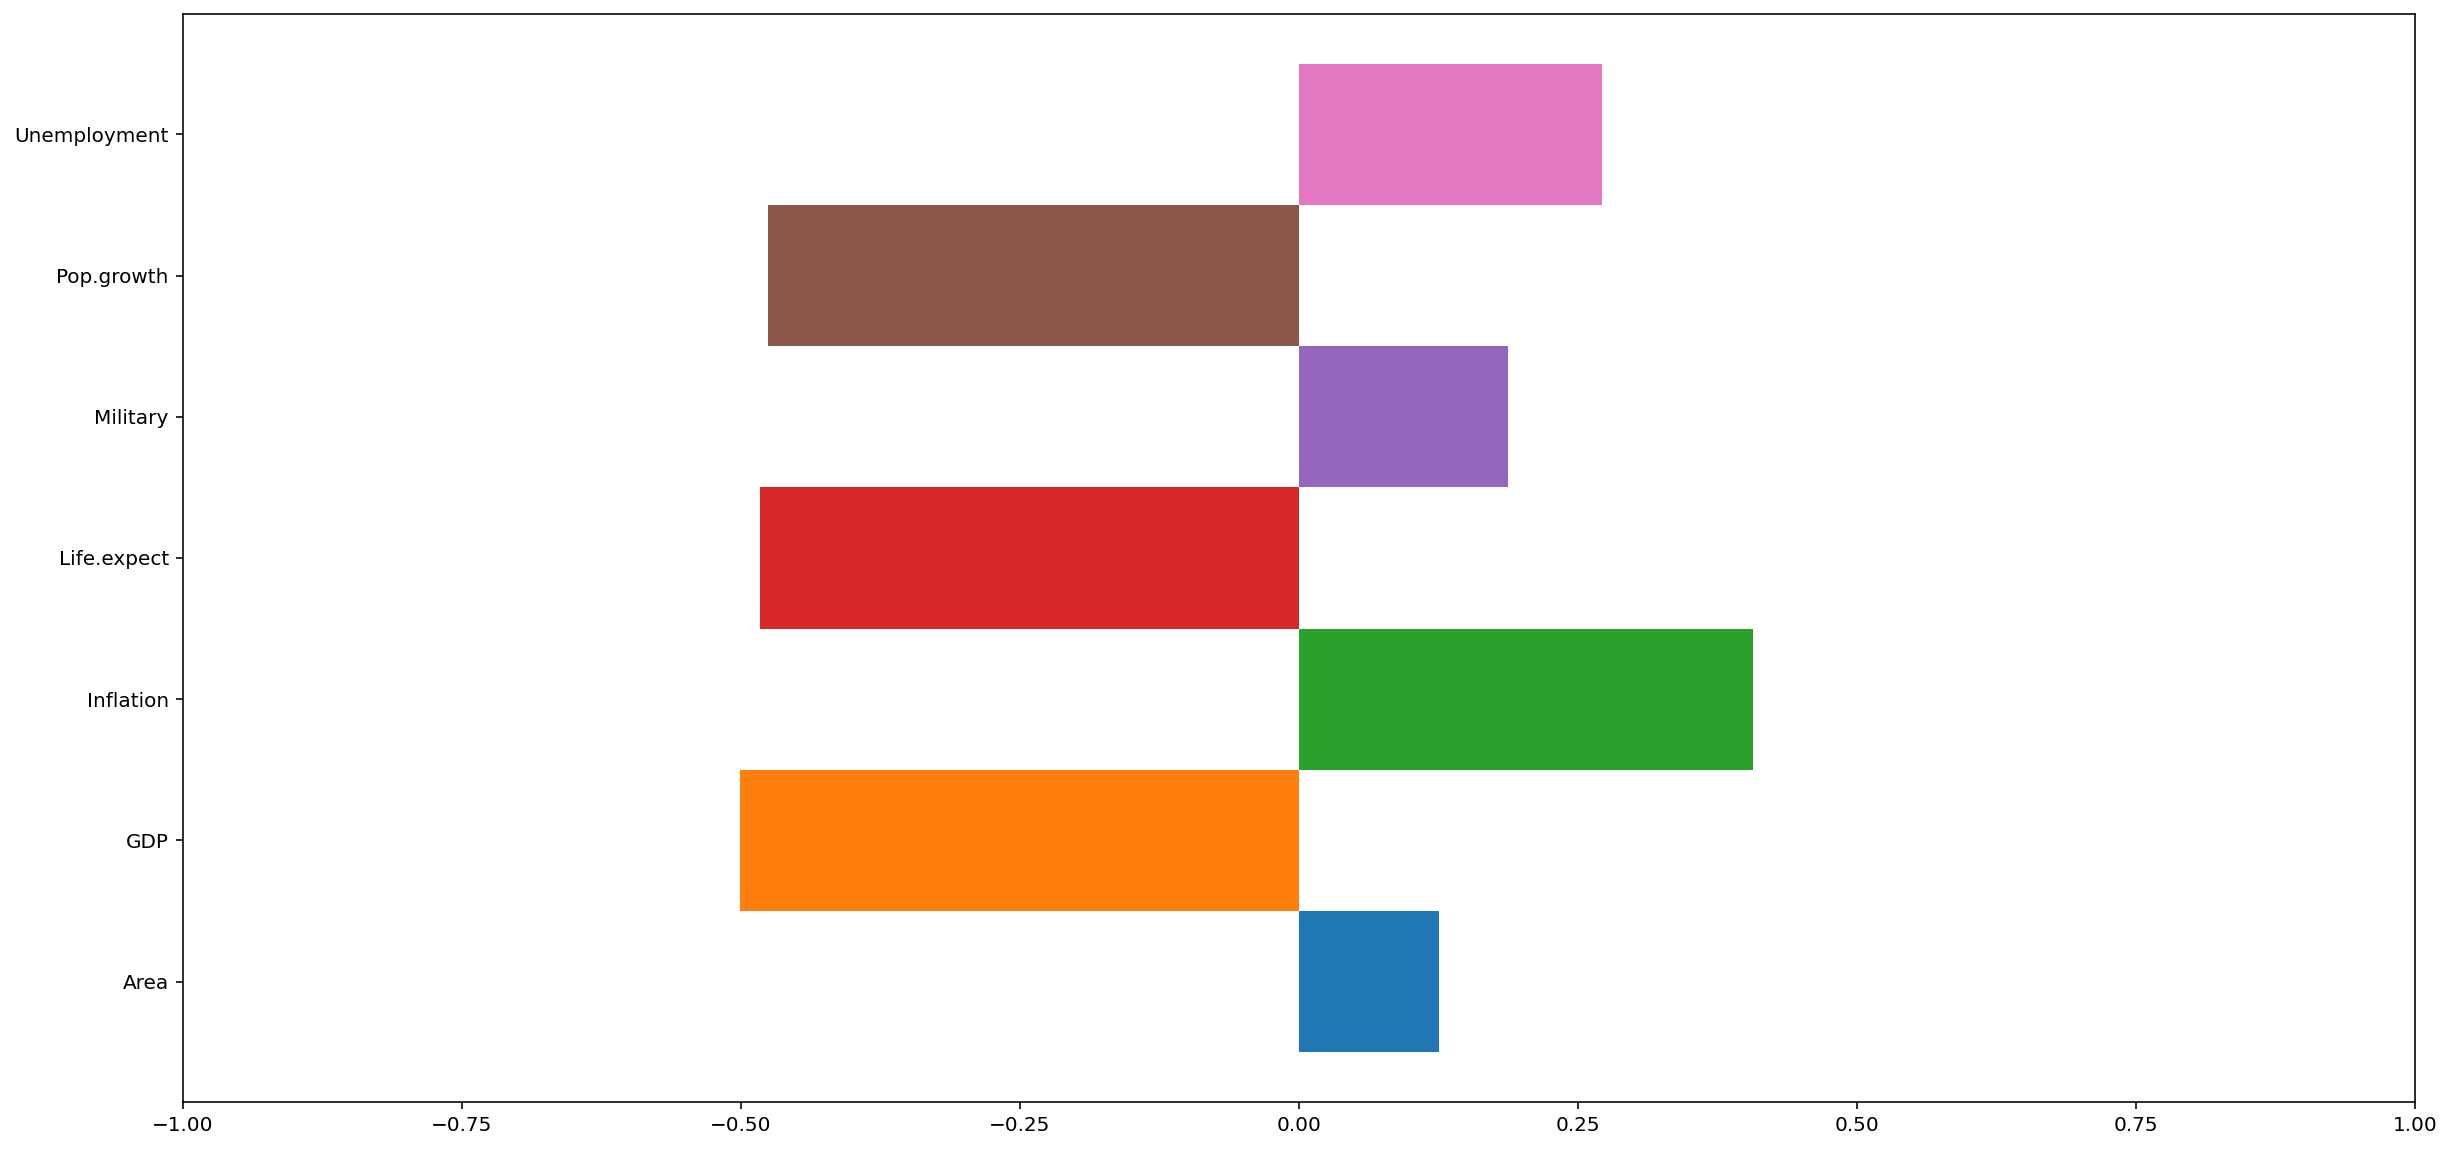

In [146]:
draw_autovectors(pca_oja,headers)

## Calculate Error with External Library

In [110]:
mse = mean_squared_error(pca.components_[0, :],pca_oja)
print(mse)

2.1643403394253796e-07
